In [1]:
# import Librarys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Data Importing
df = pd.read_csv('data/02 Household Power Consumption.txt', sep=';')
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.describe()

,Sub_metering_3
count,185702.000000
mean,6.553521
std,8.469009
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [4]:
df['Date'].describe()

count        185711
unique          131
top       18/2/2007
freq           1440
Name: Date, dtype: object

In [5]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           9
dtype: int64

<AxesSubplot:>

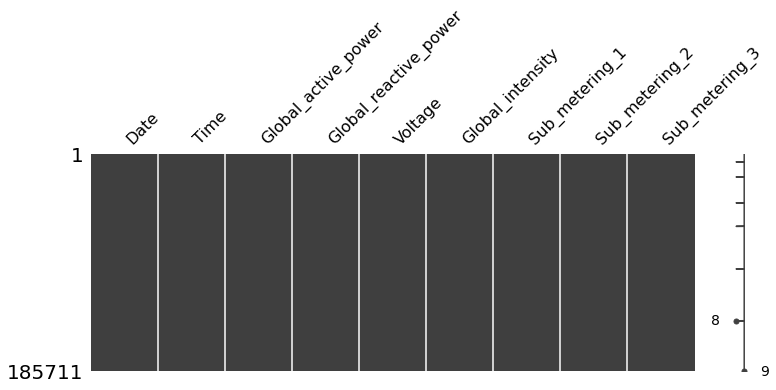

In [6]:
msno.matrix(df, figsize=(12, 4))

In [7]:
# Replace all ? with NAN. 
# This is useful in cases when you know the origin of the data and can be certain which values should be missing.
df.replace('?', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)

In [8]:
df['Date'].value_counts()

18/2/2007     1440
22/4/2007     1440
19/3/2007     1440
18/3/2007     1440
17/3/2007     1440
              ... 
21/4/2007     1440
20/1/2007     1439
24/4/2007      995
16/12/2006     396
8                1
Name: Date, Length: 131, dtype: int64

In [9]:
df.iloc[49850:49860,:].head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49850,20/1/2007,08:14:00,1.122,0.106,237.880,4.800,0.000,0.000,0.0
49851,20/1/2007,08:15:00,1.122,0.108,238.400,4.600,0.000,0.000,0.0
49852,20/1/2007,08:16:00,1.118,0.108,238.230,4.600,0.000,0.000,0.0
49853,20/1/2007,08:17:00,1.606,0.102,237.830,7.600,0.000,0.000,0.0
49854,20/1/2007,08:18:00,3.124,0.084,236.420,13.200,0.000,0.000,0.0
49855,8,08:19:00,2.984,0.086,236.340,12.600,0.000,0.000,0.0
49856,20/1/2007,08:20:00,1.622,0.102,238.160,7.800,0.000,0.000,0.0
49857,20/1/2007,08:21:00,0.840,0.114,239.480,3.600,0.000,0.000,0.0
49858,20/1/2007,08:22:00,0.828,0.112,239.070,3.400,0.000,0.000,0.0
49859,20/1/2007,08:23:00,0.834,0.118,240.460,3.400,0.000,0.000,0.0


In [10]:
df.replace({'8': '20/1/2007'}, inplace=True)

In [11]:
# Check Duplicates
df["is_duplicate"]= df.duplicated()
df.shape

(185711, 10)

In [12]:
# Remove Duplicates 
df = df.drop_duplicates(subset=None,keep="first") # Dropping duplicate rows
df = df.drop(['is_duplicate'],axis=1)  # Dropping created 'is_duplicate' column 
df.shape

(185711, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185701 non-null  object 
 3   Global_reactive_power  185702 non-null  object 
 4   Voltage                185701 non-null  object 
 5   Global_intensity       185700 non-null  object 
 6   Sub_metering_1         185702 non-null  object 
 7   Sub_metering_2         185702 non-null  object 
 8   Sub_metering_3         185702 non-null  float64
dtypes: float64(1), object(8)
memory usage: 14.2+ MB


In [14]:
# make dataset numeric
df['Global_active_power'] = [float(x) for x in df['Global_active_power']]
df['Global_reactive_power'] = [float(x) for x in df['Global_reactive_power']]
df['Voltage'] = [float(x) for x in df['Voltage']]
df['Global_intensity'] = [float(x) for x in df['Global_intensity']]
df['Sub_metering_1'] = [float(x) for x in df['Sub_metering_1']]
df['Sub_metering_2'] = [float(x) for x in df['Sub_metering_2']]
df['Sub_metering_3'] = [float(x) for x in df['Sub_metering_3']]

In [15]:
# Replace the missing values with the mean
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

In [16]:
df['Date'].describe() # the unique values shows that there is a dataset of 130 day [from 2006-12-06 to 2007-04-24] 
                    #   and the top freq is 1440 [24 hours * 60 min] that means the data of each min a day

count        185711
unique          130
top       19/2/2007
freq           1440
Name: Date, dtype: object

In [17]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\2686295383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


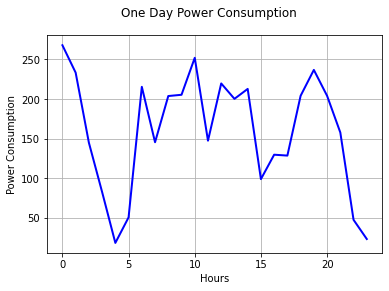

In [18]:
# Plot hourly Power Consumption for one day
df_plot = df[df.Date == '18/2/2007']
df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
hourly_data = df_plot[['hour', 'Global_active_power']]
hourly_data = df_plot.groupby(['hour'], as_index = False)['Global_active_power'].agg('sum')
plt.plot(hourly_data['hour'], hourly_data['Global_active_power'], 'b', linewidth=2.0)
plt.xlabel('Hours')
plt.ylabel('Power Consumption')
plt.suptitle('One Day Power Consumption')
plt.grid(True)
plt.show()

In [19]:
# merge Date and Time into a datetime object
util_series = df['Date'] + ' ' + df['Time']
df['DateTime'] = util_series.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [20]:
dt = df.copy()

In [21]:
#drop old Date and Time columns
df.drop(columns = ['Date','Time'],inplace = True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [22]:
# Rearranging columns
cols = list(df.columns)
cols = cols[-1:] + cols[:-1]
data = df[cols]
data

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
185706,2007-04-24 16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0
185707,2007-04-24 16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0
185708,2007-04-24 16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0
185709,2007-04-24 16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0


## Data Analysis

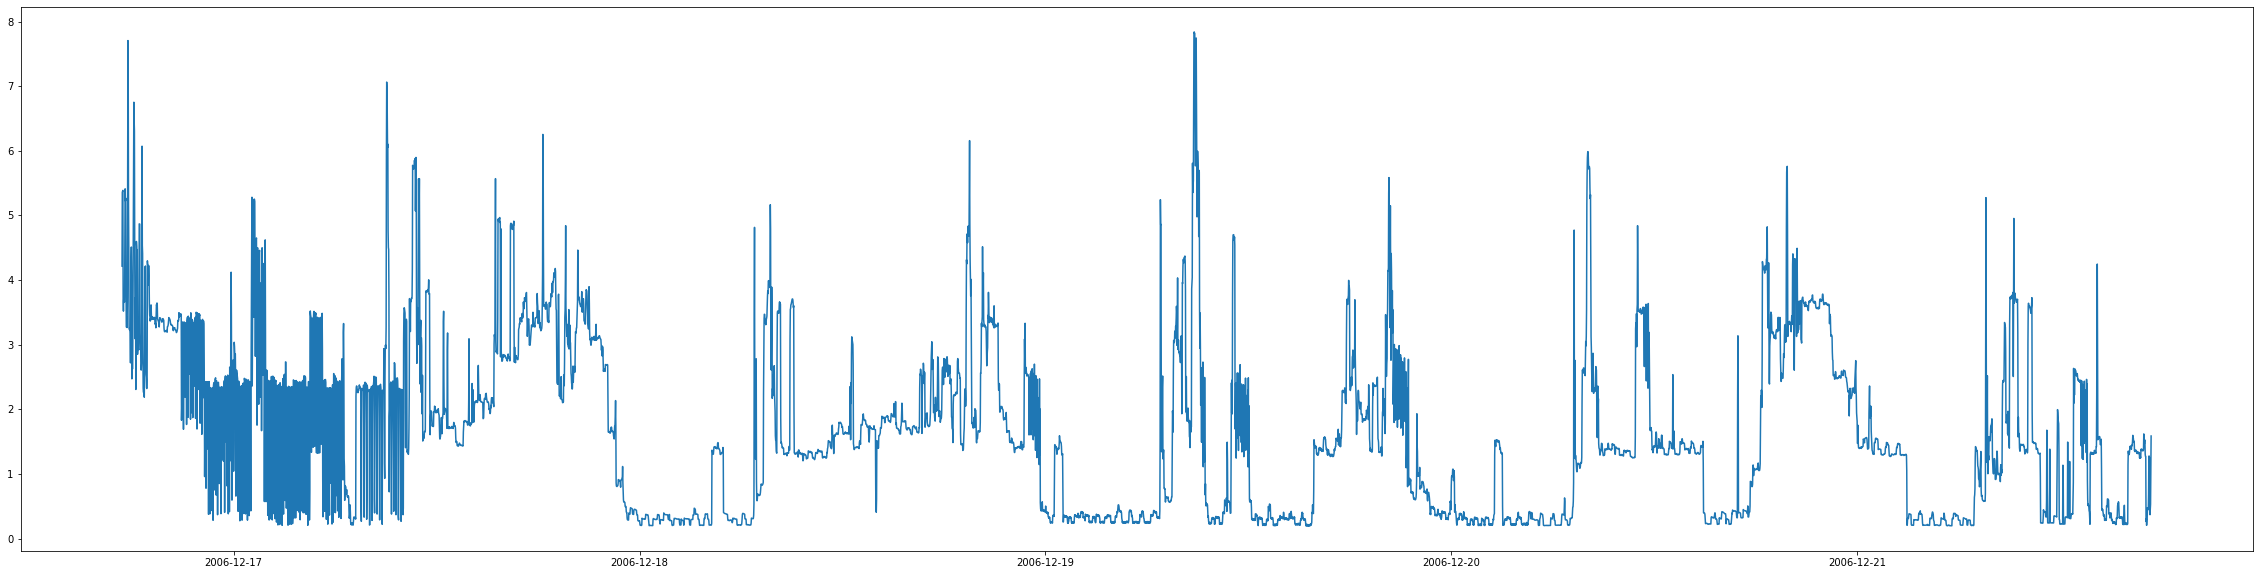

In [23]:
plt.figure(figsize=(40,10))

# plot for 5 days = 7200 minutes
plt.plot(data['DateTime'][:7200],[float(x) for x in data['Global_active_power']][:7200])

In [24]:
data.isnull().any(axis = 1).sum()

0

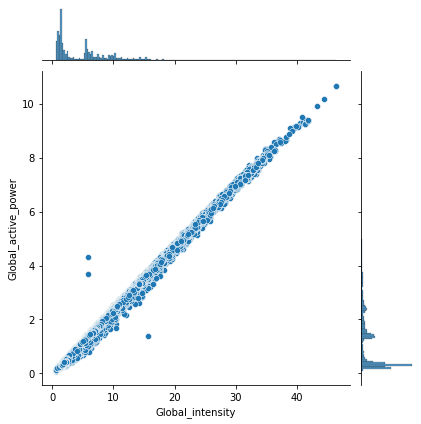

In [25]:
# The correlations between 'Global_intensity', 'Global_active_power'
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

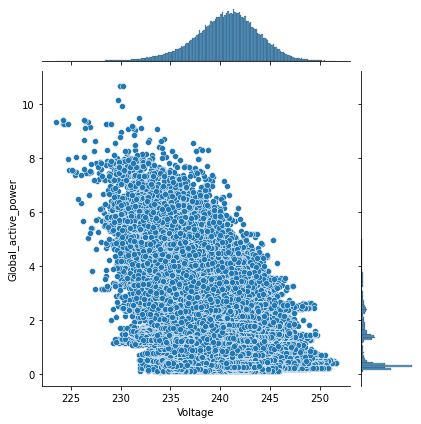

In [26]:
# The correlations between 'Voltage' and  'Global_active_power'

sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()

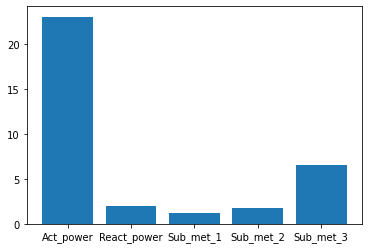

In [27]:
names = ['Act_power', 'React_power', 'Sub_met_1', 'Sub_met_2', 'Sub_met_3']
values = [23.042456, 2.027712, 1.232561, 1.783675, 6.553521]
plt.bar(names, values)
plt.show()

#### From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

(8.0, 0.0)

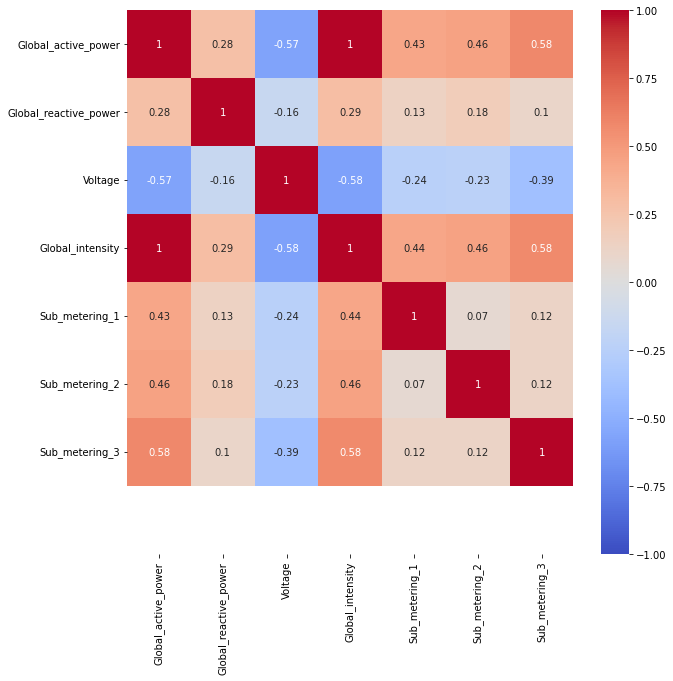

In [28]:
# Calculate correlations among Columns
#There is a strong correlation between 'Global_active_power and 'Global_intensity' beacuse P = V * I
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
ax.set_ylim(8, 0)

In [29]:
def month(x):
    return x.month
data['Month']= data['DateTime'].apply(lambda x: month(x))

def Day(x):
    return x.Day
data['Day']=data['DateTime'].apply(lambda x: x.day)

def hour(x):
    return x.hour
data['Hour']= data['DateTime'].apply(lambda x: hour(x))

C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\3343078529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']= data['DateTime'].apply(lambda x: month(x))
C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\3343078529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day']=data['DateTime'].apply(lambda x: x.day)
C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\3343078529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [30]:
data.drop('DateTime',axis=1,inplace=True)
data.tail()

C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\1078037314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('DateTime',axis=1,inplace=True)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Day,Hour
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,4,24,16
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,4,24,16
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,4,24,16
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,4,24,16
185710,0.408,0.174,234.82,2.0,0.0,1.0,0.0,4,24,16


<AxesSubplot:xlabel='Month', ylabel='Global_active_power'>

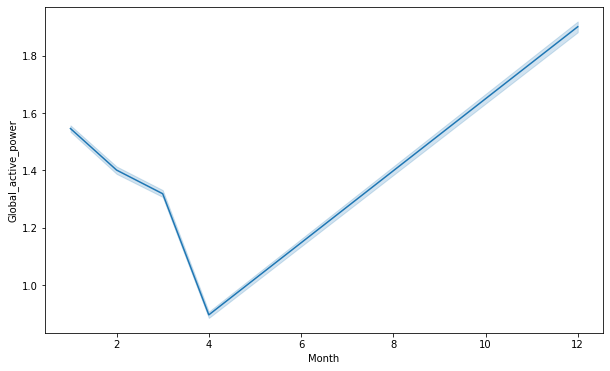

In [31]:
# Monthly change of Global_active_power
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Day', ylabel='Global_active_power'>

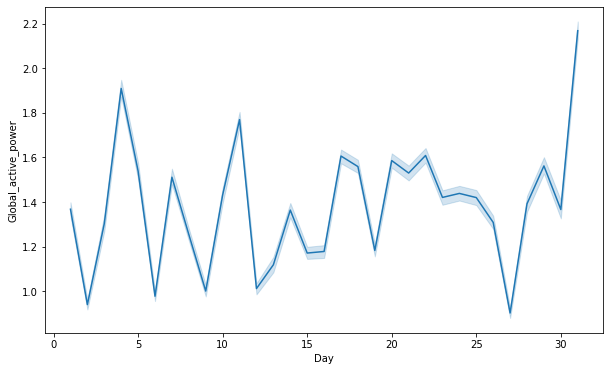

In [32]:
# Dayly change of Global_active_power
plt.figure(figsize=(10,6))
sns.lineplot(x="Day", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Month', ylabel='Global_active_power'>

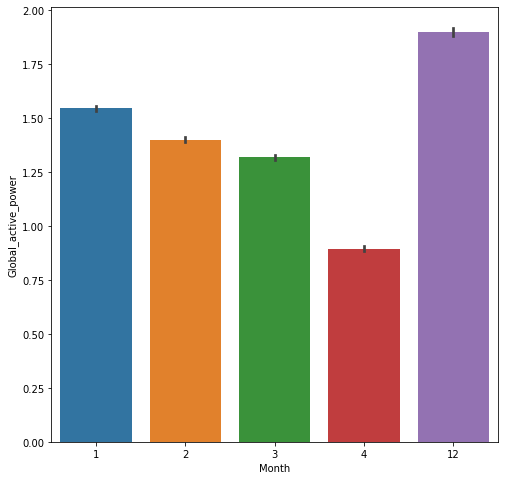

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x="Month", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Day', ylabel='Global_active_power'>

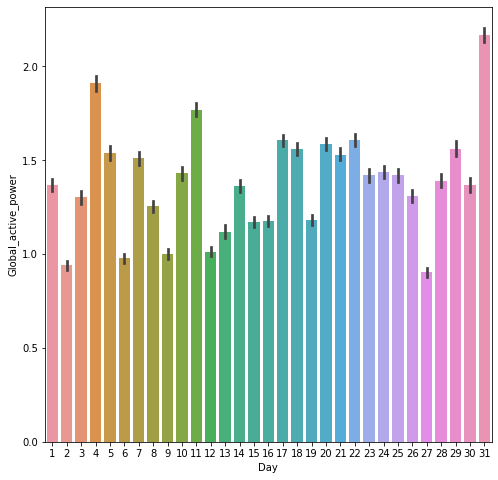

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(x="Day", y="Global_active_power",data=data)

## Data Pre-processing

In [35]:
dt.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [36]:
X = df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

In [37]:
X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0.0,1.0,17.0
1,0.436,233.63,23.0,0.0,1.0,16.0
2,0.498,233.29,23.0,0.0,2.0,17.0
3,0.502,233.74,23.0,0.0,1.0,17.0
4,0.528,235.68,15.8,0.0,1.0,17.0


In [38]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 2.63170322, -1.83119543,  2.29981017, -0.18966632, -0.10940885,
         1.23352804],
       [ 2.79155707, -2.21309103,  3.14293801, -0.18966632, -0.10940885,
         1.11544729],
       [ 3.34216476, -2.32040053,  3.14293801, -0.18966632,  0.03020114,
         1.23352804],
       ...,
       [-0.29895064, -1.81225846, -0.74278159, -0.18966632, -0.10940885,
        -0.7738447 ],
       [ 0.46479552, -1.68916814, -0.70612386, -0.18966632, -0.10940885,
        -0.7738447 ],
       [ 0.46479552, -1.83750775, -0.70612386, -0.18966632, -0.10940885,
        -0.7738447 ]])

In [39]:
dt.shape

(185711, 10)

In [40]:
# Rearranging columns
cols = list(dt.columns)
cols = cols[-1:] + cols[:-1]
dt2 = dt[cols]
dt2.head(5)

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [41]:
# add a column for for the remainder of sub metering
eq1 = (dt2['Global_active_power'] * 1000/60) 
eq2 = dt2['Sub_metering_1'] + dt2['Sub_metering_2'] + dt2['Sub_metering_3']
dt2['Sub_metering_4'] = eq1 - eq2
dt2.head(3)

C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\3323042364.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Sub_metering_4'] = eq1 - eq2


,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [42]:
# drop old Date and Time columns
dt2.drop(columns = ['Date','Time'],inplace = True)
dt2.head(3)

C:\Users\saifa\AppData\Local\Temp\ipykernel_10764\3920541985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2.drop(columns = ['Date','Time'],inplace = True)


,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

### Linear Regression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

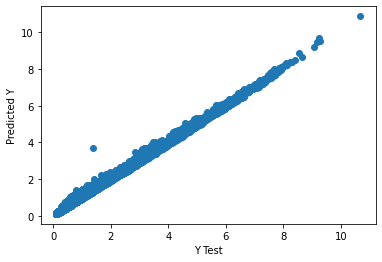

In [50]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.029515936614248787
MSE: 0.002414130331155422
RMSE: 0.04913380029221658


c:\Users\saifa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

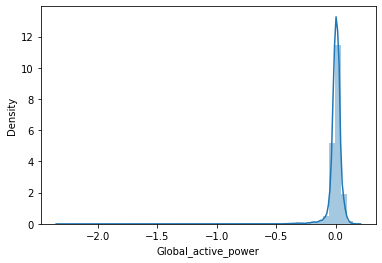

In [52]:
sns.distplot((y_test-predictions),bins=50)

In [53]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
37074,1.302,1.323517
129874,1.650,1.662365
161710,2.370,2.318220
45580,2.394,2.361139
170181,0.326,0.315364
...,...,...
45340,0.210,0.192889
163722,1.312,1.288883
160445,0.242,0.235329
4325,1.562,1.548644


In [54]:
df.shape

(185711, 8)

# Keras Sequential Model

In [55]:
model=Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [56]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
4063/4063 [==============================] - 6s 1ms/step - loss: 0.0267
Epoch 2/20
4063/4063 [==============================] - 5s 1ms/step - loss: 0.0048
Epoch 3/20
4063/4063 [==============================] - 5s 1ms/step - loss: 0.0040
Epoch 4/20
4063/4063 [==============================] - 5s 1ms/step - loss: 0.0036
Epoch 5/20
4063/4063 [==============================] - 5s 1ms/step - loss: 0.0033
Epoch 6/20
4063/4063 [==============================] - 5s 1ms/step - loss: 0.0031
Epoch 7/20
4063/4063 [==============================] - 5s 1ms/step - loss: 0.0030
Epoch 8/20
4063/4063 [==============================] - 7s 2ms/step - loss: 0.0028
Epoch 9/20
4063/4063 [==============================] - 8s 2ms/step - loss: 0.0027
Epoch 10/20
4063/4063 [==============================] - 8s 2ms/step - loss: 0.0026
Epoch 11/20
4063/4063 [==============================] - 9s 2ms/step - loss: 0.0025
Epoch 12/20
4063/4063 [==============================] - 7s 2ms/step - loss: 0.0025
E

### Evaluating Model Performance

In [57]:
losses = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Loss')

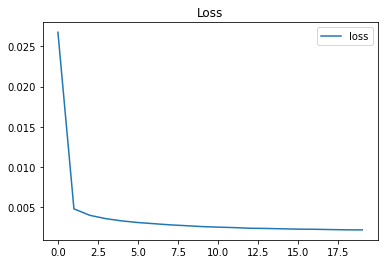

In [58]:
losses.plot()
plt.title('Loss')

In [59]:
predictions_deep = model.predict(X_test)

In [60]:
print('Results of Deep Neural Network:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_deep))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_deep))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_deep)))

Results of Deep Neural Network:

Mean Absolute Error: 0.039513976555083215
Mean Squared Error: 0.0032150782074359787
Root Mean Squared Error: 0.056701659653276275


In [61]:
df_1 = pd.DataFrame({'Actual': y_test})

In [62]:
predict_ser=pd.Series(predictions_deep.reshape(55714,))

In [63]:
df1_result=pd.concat([df_1,predict_ser],axis=1)

In [64]:
df1_result

,Actual,0
37074,1.302,3.054011
129874,1.650,NaN
161710,2.370,NaN
45580,2.394,4.610422
170181,0.326,NaN
...,...,...
55705,NaN,0.215540
55710,NaN,1.282514
55711,NaN,0.237632
55712,NaN,1.500769


In [65]:
df1_result.columns=['Actual','Predicted']

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

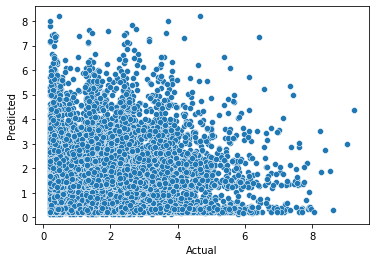

In [66]:
sns.scatterplot(x='Actual',y='Predicted',data=df1_result)